In [79]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go


# Machine learning
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# sign test
from scipy.stats import binom

In [2]:
# Loading data, dropna removes all NaN data
data = pd.read_csv("adult.csv").dropna()
data.head(10)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married                  ?      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married                  ?      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K  
8             0             0              40  United-States  <=50K  
9             0             0              10  United-States  <=50K

In [3]:
# data clean up

print("Before clean up:",len(data))

# Removed because we find in it stange to use questionmarks in a dataset
data = data[data['native-country'] != '?']
print("After removing '?' from 'native-country' column: ",len(data))
data = data[data['workclass'] != '?']
print("After removing '?' from 'workclass' column: ",len(data))
data = data[data['occupation'] != '?']
print("After removing '?' from 'occupation' column: ",len(data))

Before clean up: 48842
After removing '?' from 'native-country' column:  47985
After removing '?' from 'workclass' column:  45232
After removing '?' from 'occupation' column:  45222


In [4]:
#native country, education want education-num.
   
print(f"\nage range: {min(data.age)} to {max(data.age)}")
print(f"\npercentage >50k: {((data['income'] == '>50K').mean() * 100):.2f}%, <=50k: {((data['income'] == '<=50K').mean() * 100):.2f}%")
print(f"\nTotal >50k: {((data['income'] == '>50K').sum())}, <=50k: {((data['income'] == '<=50K').sum())}")
print(f"\npercentage White: {((data['race'] == 'White').mean() * 100):.2f}%, Black: {((data['race'] == 'Black').mean() * 100):.2f}%, Asian-Pac-Islander: {((data['race'] == 'Asian-Pac-Islander').mean() * 100):.2f}%, Amer-Indian-Eskimo: {((data['race'] == 'Amer-Indian-Eskimo').mean() * 100):.2f}%, Other: {((data['race'] == 'Other').mean() * 100):.2f}%")
print(f"\nTotal White: {((data['race'] == 'White').sum())}, Black: {((data['race'] == 'Black').sum())}, Asian-Pac-Islander: {((data['race'] == 'Asian-Pac-Islander').sum())}, Amer-Indian-Eskimo: {((data['race'] == 'Amer-Indian-Eskimo').sum())}, Other: {((data['race'] == 'Other').sum())}")
print(f"\npercentage Male: {((data['gender'] == 'Male').mean() * 100):.2f}%, Female: {((data['gender'] == 'Female').mean() * 100):.2f}%")
print(f"\nTotal Male: {((data['gender'] == 'Male').sum())}, Female: {((data['gender'] == 'Female').sum())}")

# Group df by education level
gender_groups = data.groupby('gender')
# income split by education levels
education_groups = data.groupby('education')
# income split by race
race_groups = data.groupby('race')

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = education_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = education_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_data = pd.DataFrame({
    'Highest education Level': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_data.to_string(index=False)}")

# gender split by education levels
# Calculate percentage of people with income >50K and <=50K for each education level
percentage_male = education_groups['gender'].apply(lambda x: (x == 'Male').mean() * 100)
percentage_female = education_groups['gender'].apply(lambda x: (x == 'Female').mean() * 100)
# Create an overview table
overview_data = pd.DataFrame({
    'Highest education Level': percentage_male.index,
    'Male Percentage': percentage_male.values,
    'Female Percentage': percentage_female.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_data.to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = race_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = race_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_data = pd.DataFrame({
    'Race': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})
# Print the overview table without numbers in front of the values
print(f"\n{overview_data.sort_values(by='>50K Percentage', ascending=False).to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_male = race_groups['gender'].apply(lambda x: (x == 'Male').mean() * 100)
percentage_female = race_groups['gender'].apply(lambda x: (x == 'Female').mean() * 100)
# Create an overview table
overview_data = pd.DataFrame({
    'Race': percentage_male.index,
    'Male Percentage': percentage_male.values,
    'Female Percentage': percentage_female.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_data.to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = gender_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = gender_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_data = pd.DataFrame({
    'Gender': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})
# Print the overview table
print(f"\n{overview_data.sort_values(by='>50K Percentage', ascending=False).to_string(index=False)}")



age range: 17 to 90

percentage >50k: 24.78%, <=50k: 75.22%

Total >50k: 11208, <=50k: 34014

percentage White: 86.03%, Black: 9.35%, Asian-Pac-Islander: 2.88%, Amer-Indian-Eskimo: 0.96%, Other: 0.78%

Total White: 38903, Black: 4228, Asian-Pac-Islander: 1303, Amer-Indian-Eskimo: 435, Other: 353

percentage Male: 67.50%, Female: 32.50%

Total Male: 30527, Female: 14695

Highest education Level  >50K Percentage  <=50K Percentage
                   10th         6.704824         93.295176
                   11th         5.497221         94.502779
                   12th         7.452340         92.547660
                1st-4th         3.603604         96.396396
                5th-6th         4.899777         95.100223
                7th-8th         6.682868         93.317132
                    9th         5.621302         94.378698
             Assoc-acdm        26.410086         73.589914
              Assoc-voc        25.727412         74.272588
              Bachelors        41.98

In [5]:
# Change df to Numpy
y_attr_names = data.columns.tolist()
X_data_numpy = data.to_numpy()

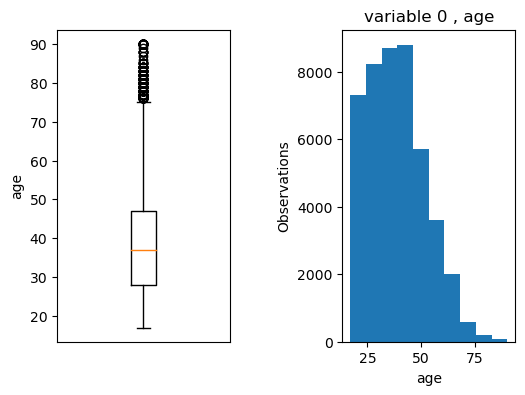

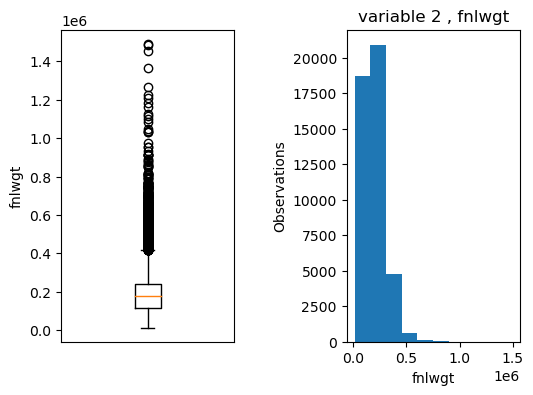

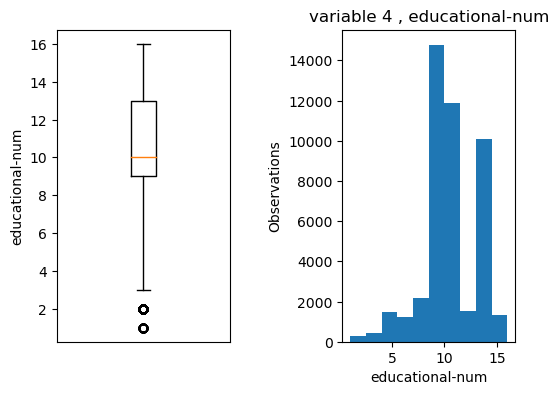

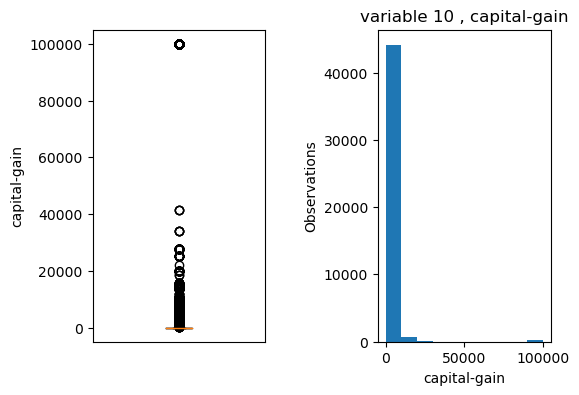

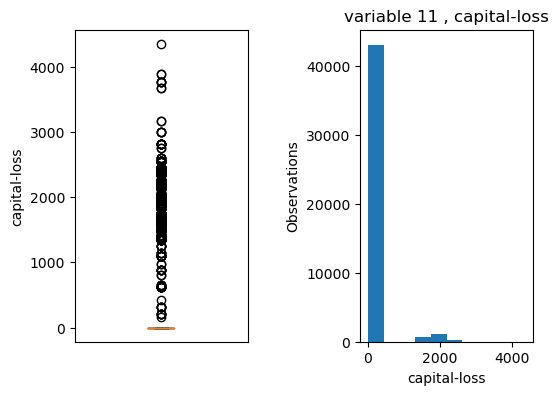

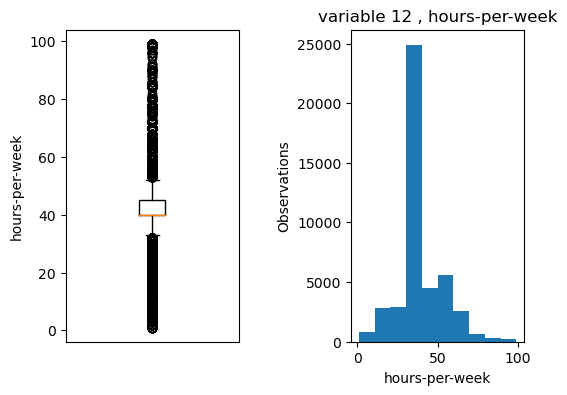

In [6]:
# Graphical data persentation of numerical variables, in the form of boxplot and histogram

numerical_variables = np.array(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

indices_numerical_variables = np.where(np.isin(y_attr_names, numerical_variables))[0]  # indices where numerical_variables coincide with y_attr_names
for i in range(indices_numerical_variables.size):
    f, (boxp, histo) = plt.subplots(1,2)
    f.tight_layout(pad=5.0)
    boxp.boxplot(X_data_numpy[:, indices_numerical_variables[i]])
    boxp.xaxis.set_visible(False)
    boxp.set(ylabel = "{}".format(numerical_variables[i]))
    plt.title("variable {} , {}".format(indices_numerical_variables[i], numerical_variables[i]))
    histo.hist(X_data_numpy[:, indices_numerical_variables[i]])
    plt.xlabel("{}".format(numerical_variables[i]))
    plt.ylabel("Observations")


plt.show()

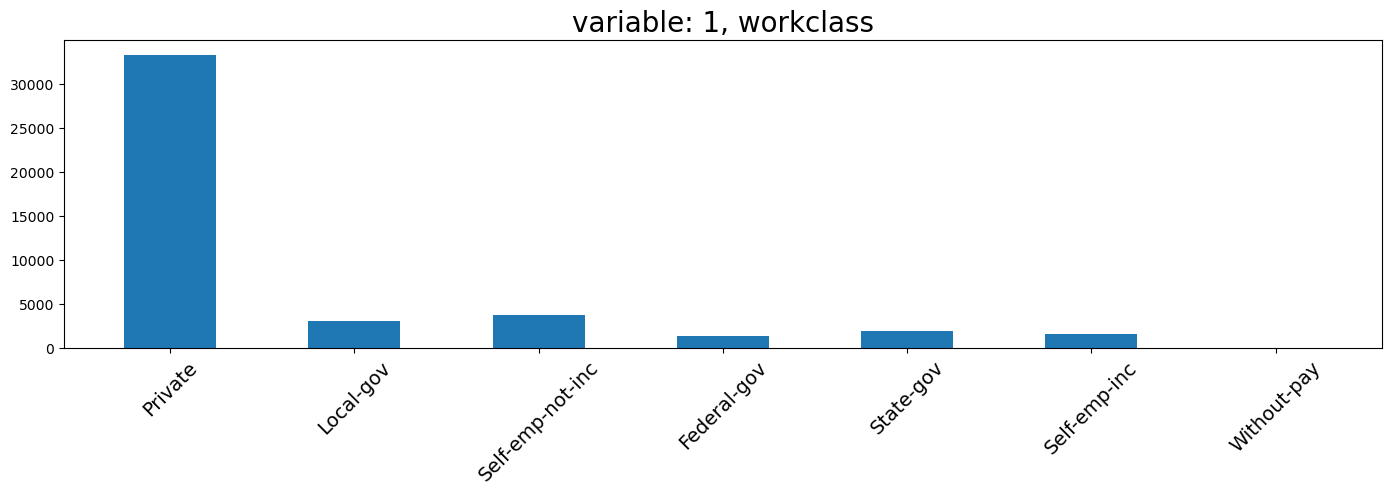

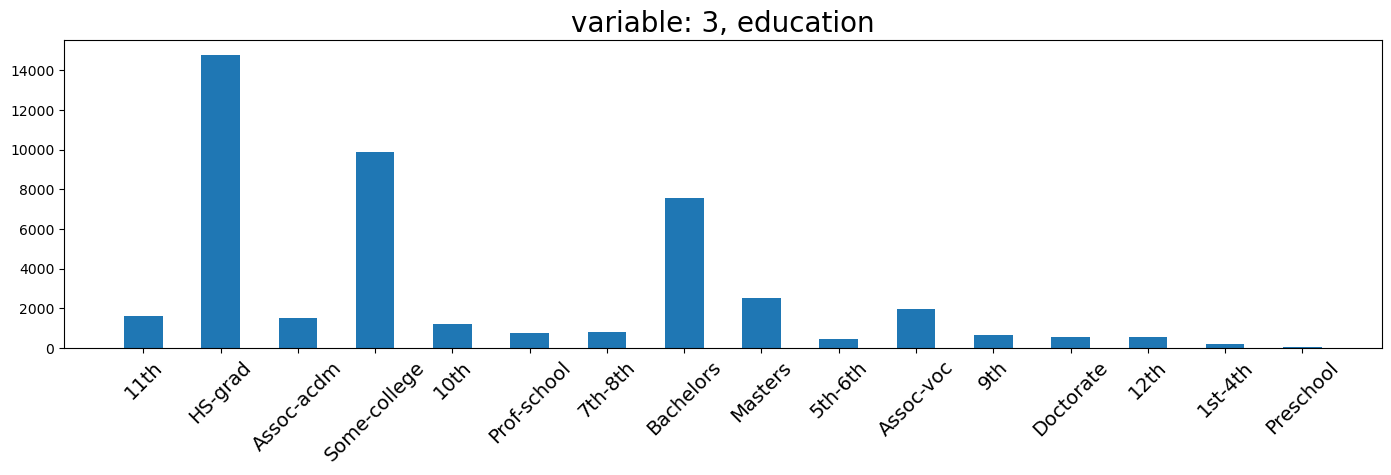

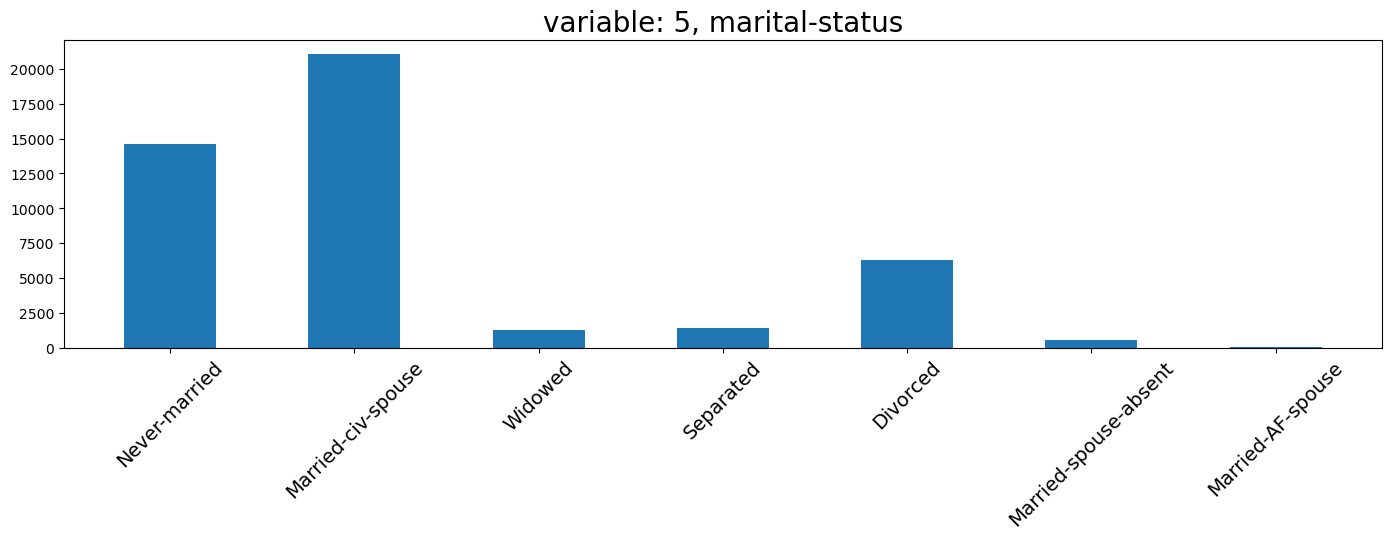

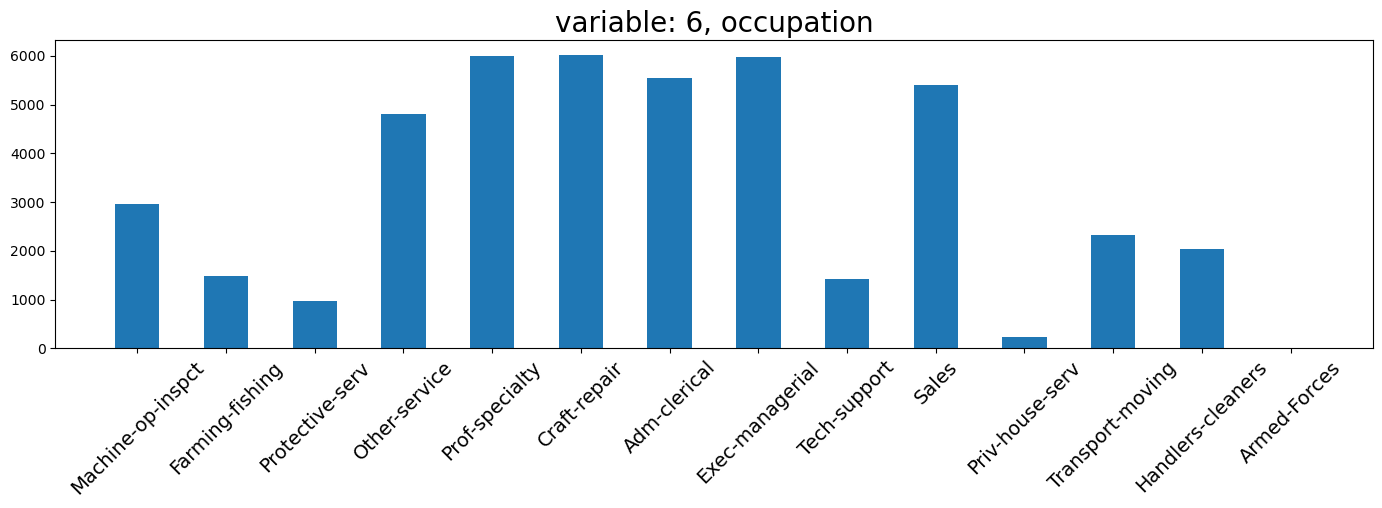

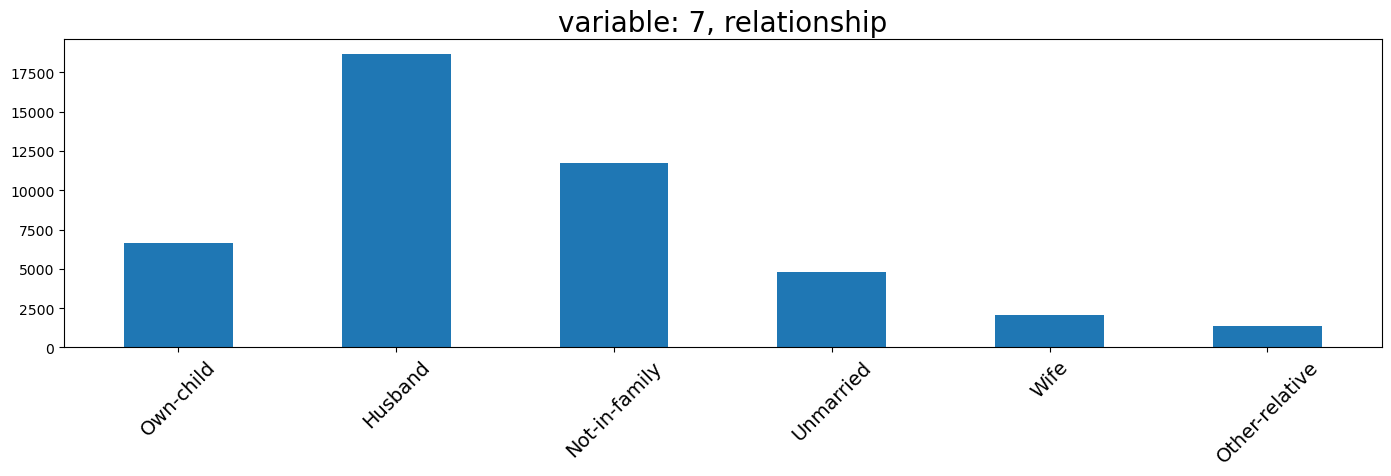

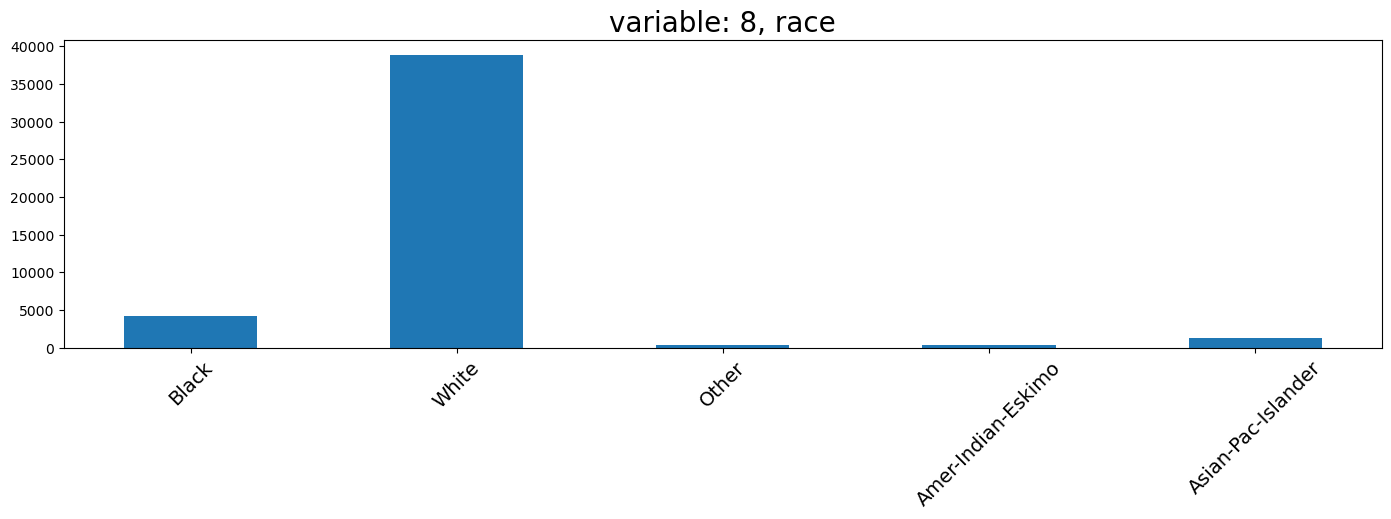

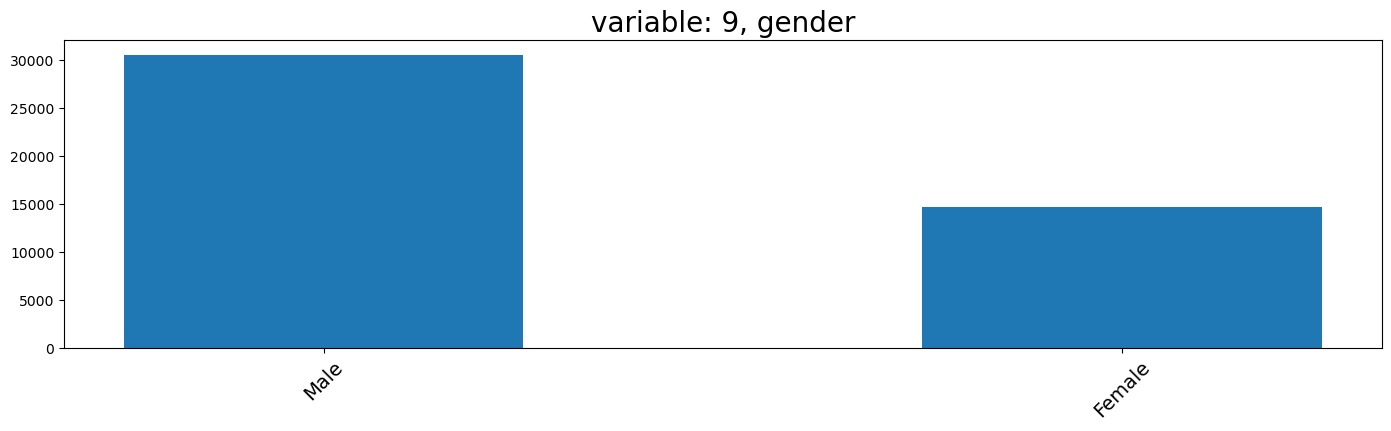

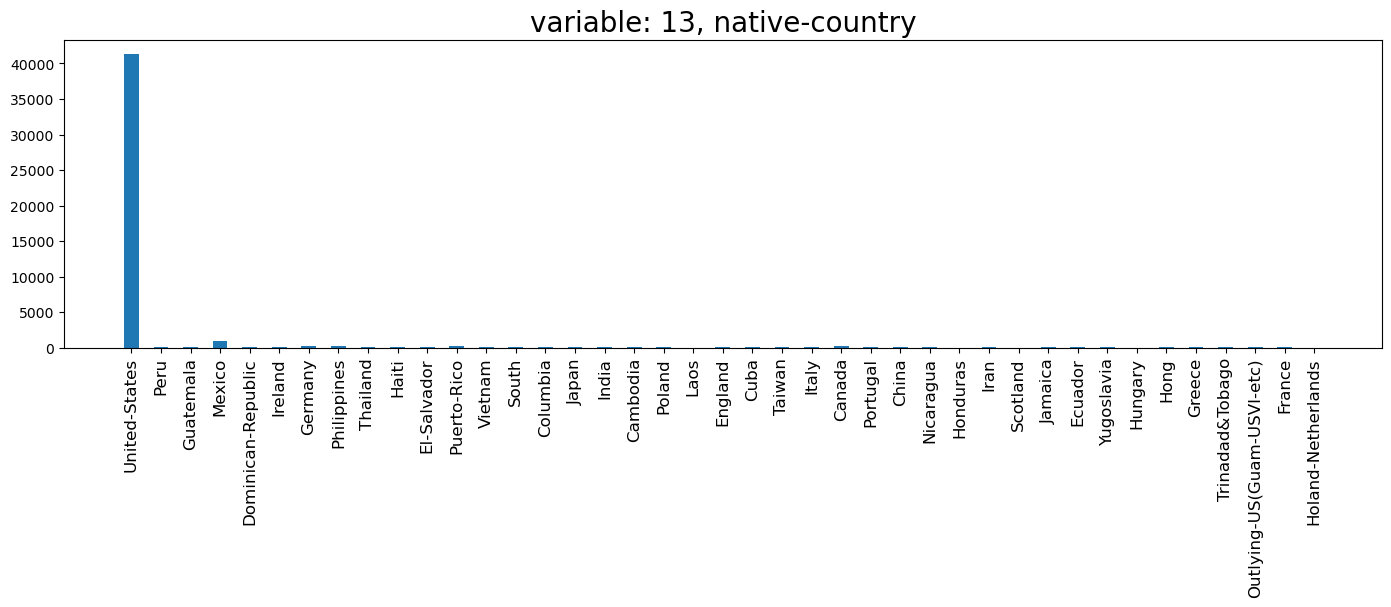

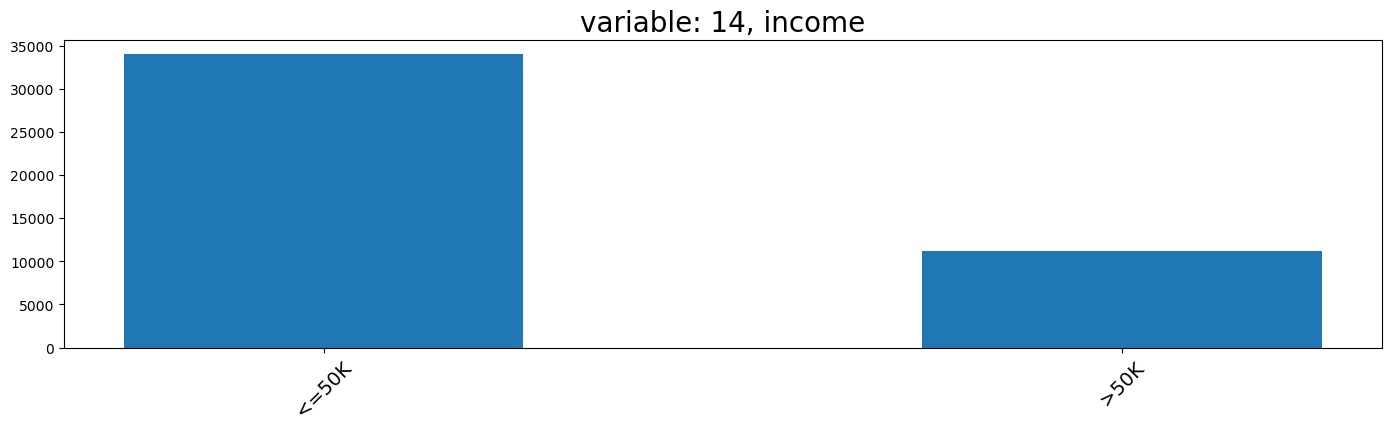

In [7]:
# Graphical data persentation of categorial data, in the form of bar charts.
categorical_variables = np.array(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'])

indices_categorical_variables = np.where(np.isin(y_attr_names, categorical_variables))[0]

for i in range(indices_categorical_variables.size) :
    counter = Counter(X_data_numpy[:, indices_categorical_variables[i]])
    categories = list(counter.keys())
    values = list(counter.values())
    plt.tight_layout
    fig = plt.figure(figsize=(17,4))
    plt.bar(categories, values, width = 0.5)
    plt.title("variable: {}, {}".format(indices_categorical_variables[i], categorical_variables[i]), fontsize=20)
    if (categorical_variables[i] == 'native-country') :
        plt.xticks(rotation=90, fontsize=12)
    else :
        plt.xticks(rotation=45, fontsize=14)
    plt.show()

# Variables used for both Adaboost and RandomForest
This also contains same data, and data splits.<br>
To ensure fairness in the comparison between RandomForest and Adaboost classifiers, only variables common to both algorithms are considered for a comprehensive and unbiased evaluation.

In [22]:
# categorical data to numerical data and splitting data
df=data

# Change >50k and <=50k to 1 and 0
y = df['income'].map({'>50K': 1, '<=50K': 0})
y = y.to_numpy()
y = y.astype(int)

df = df.iloc[:, :-1]
df = pd.get_dummies(df, columns=categorical_variables[:-1])

y_attr_names = df.columns.tolist()
X = df.to_numpy()

# classifier variables
hyper_params = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
}

# # Variables to store the best results for both 5k and 10k folds
best_results = {
    "ada": {
        "classifier": None, "accuracy": 0, "X_train": None, "y_train": None
    },
    "rf": {
        "classifier": None, "accuracy": 0, "X_train": None, "y_train": None
    }
}

accuracy_ada_list = []
accuracy_rf_list = []


TypeError: list indices must be integers or slices, not str

In [9]:
# Function to check if new value is better than old value max_depth and n_estimators is not a var, can be extracted from the classifiers
def update_best_results(algorithm, classifier, accuracy, X_train, y_train):
    if accuracy > best_results[algorithm]["accuracy"]:
        best_results[algorithm]["classifier"] = classifier
        best_results[algorithm]["accuracy"] = accuracy
        best_results[algorithm]["X_train"] = X_train
        best_results[algorithm]["y_train"] = y_train

In [10]:
# Variables for k-folds and 80/20 split for train/test and verify
random_state = 123
k_fold_splits = 10

# Split the data into 80% training & testing and 20% verifying
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=random_state)

# Print the shape of the training and testing sets
print(f"Train set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}\n")

Train set shape: X_train=(36177, 104), y_train=(36177,)
Test set shape: X_test=(9045, 104), y_test=(9045,)



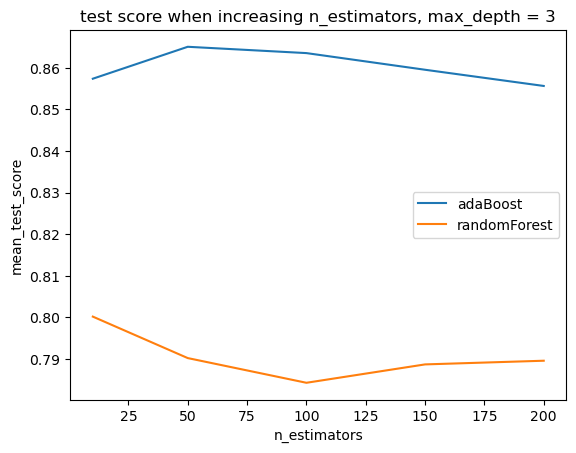

Example gridsearchCV results for max depth = 3


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.724756      0.513836         0.027966        0.003257   
1      38.105653      2.551088         0.145326        0.027870   
2      72.587083      6.237041         0.261821        0.025673   
3     106.797088     10.819657         0.414566        0.066502   
4     129.360700     20.920023         0.413215        0.119055   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.835821   
1                 50   {'n_estimators': 50}           0.831675   
2                100  {'n_estimators': 100}           0.832781   
3                150  {'n_estimators': 150}           0.830846   
4                200  {'n_estimators': 200}           0.830846   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.841072           0.830293           0.831675           0.837479   
1           0.839967           0.831122           0.847982           0.832228   
2           0.838032           0.830846           0.849088           0.832781   
3           0.836374           0.829740           0.851852           0.831675   
4           0.837479           0.829187           0.849364           0.833333   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.838032           0.840520           0.839093           0.835776   
1           0.834163           0.836097           0.835776           0.834117   
2           0.834163           0.834992           0.834393           0.833840   
3           0.833057           0.835821           0.834946           0.834670   
4           0.830846           0.836926           0.834117           0.833287   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.839370         0.836913        0.003412                1  
1           0.841305         0.836443        0.004992                2  
2           0.842964         0.836388        0.005304                3  
3           0.842687         0.836167        0.006260                4  
4           0.840752         0.835614        0.005660                5

In [11]:
# Gridsearch to find the optimal hyperparameters for each classifier
# rf classifier also included since rfclassifier can use in grid search but ada cant
# store the results of each Gridsearch, into a list, because of the max_depth not being gridsearchable.
# Standard 10-fold stratified cross validation in gridSearchCV
# gridSearchCV does 10-fold stratified cross, so there is no need to do testing again afterwards.


adaBestParamList = []
rfBestParamList = []

# Function to search for the best parameters via GridSearchCV using 10-fold cross validation, comparing result with best result
# max_depth is via loop because, Adaboost handles parameters diffrent from RandomForest
for i in hyper_params["max_depth"]:
# AdaBoost
    base_classifier_ada = DecisionTreeClassifier(max_depth=i, random_state=random_state)
    ada_classifier = AdaBoostClassifier(base_classifier_ada, random_state=random_state)

    grid_search_ada = GridSearchCV(ada_classifier, {'n_estimators': hyper_params['n_estimators']}, cv=10, n_jobs= -1)
    grid_search_ada.fit(X_train, y_train)
    adaIndex = [i for i, rank in enumerate(grid_search_ada.cv_results_['rank_test_score']) if rank == 1]
    adaBestRow = {key: val[adaIndex[0]] for key, val in grid_search_ada.cv_results_.items()}
    adaBestRow["max_depth"] = i
    adaBestParamList.append(adaBestRow)
    pd.DataFrame(grid_search_ada.cv_results_)
    
    best_ada_classifier = grid_search_ada.best_estimator_
    best_score_ada = grid_search_ada.best_score_
    accuracy_ada_list.append(best_score_ada)
    # Update overall best classifier 
    update_best_results("ada", best_ada_classifier, best_score_ada, X_train, y_train)

    rf_classifier = RandomForestClassifier(max_depth=i, random_state=random_state)
    grid_search_rf = GridSearchCV(rf_classifier, {'n_estimators': hyper_params['n_estimators']}, cv=10, n_jobs= -1)
    grid_search_rf.fit(X_train, y_train)
    rfIndex = [i for i, rank in enumerate(grid_search_rf.cv_results_['rank_test_score']) if rank == 1]
    rfBestRow = {key: val[rfIndex[0]] for key, val in grid_search_rf.cv_results_.items()}
    rfBestRow["max_depth"] = i
    rfBestParamList.append(rfBestRow)

    best_rf_classifier = grid_search_rf.best_estimator_
    best_score_rf = grid_search_rf.best_score_
    accuracy_rf_list.append(best_score_rf)

    # Update overall best classifier 
    update_best_results("rf", best_rf_classifier, best_score_rf, X_train, y_train)

    # Print example of GridSearchCV of how evaluates the best hyperparameters, based on input.
    if i == hyper_params["max_depth"][2] :
        meanTestScoresAda = grid_search_ada.cv_results_["mean_test_score"]
        parametersAda = grid_search_ada.cv_results_["param_n_estimators"]
        meanTestScoresRf = grid_search_rf.cv_results_["mean_test_score"]
        parametersRf = grid_search_rf.cv_results_["param_n_estimators"]
        fig = plt.figure()
        plt.plot(parametersAda, meanTestScoresAda, label = "adaBoost")
        plt.plot(parametersRf, meanTestScoresRf, label = "randomForest")
        plt.legend()
        plt.xlabel("n_estimators")
        plt.ylabel("mean_test_score")
        plt.title(f"test score when increasing n_estimators, max_depth = {i}")
        plt.show()
        print(f"Example gridsearchCV results for max depth = {i}")


pd.DataFrame(grid_search_ada.cv_results_)  

In [12]:
# Variables for plotting the results of GridSearchCV
adaNEstimators = []
adaMaxDepth = []
adaMeanTestScore = []
for bestScore in adaBestParamList :
    adaNEstimators.append(bestScore["param_n_estimators"])
    adaMaxDepth.append(bestScore["max_depth"])
    adaMeanTestScore.append(bestScore["mean_test_score"])


rfNEstimators = []
rfMaxDepth = []
rfMeanTestScore = []
for bestScore in rfBestParamList :
    rfNEstimators.append(bestScore["param_n_estimators"])
    rfMaxDepth.append(bestScore["max_depth"])
    rfMeanTestScore.append(bestScore["mean_test_score"])

[]

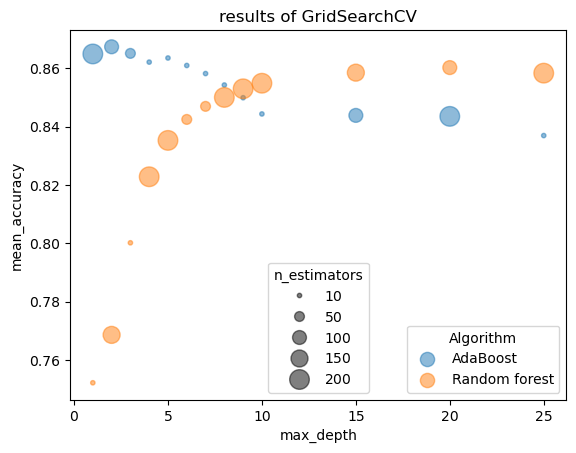

In [62]:
fig = plt.scatter(adaMaxDepth, adaMeanTestScore, s=adaNEstimators,alpha=0.5, label="AdaBoost")
plt.scatter(rfMaxDepth, rfMeanTestScore, s=rfNEstimators, alpha=0.5, label="Random forest")

plt.title("results of GridSearchCV")
plt.xlabel("max_depth")
plt.ylabel("mean_accuracy")

# Create a legend for the sizes
legend1 = plt.legend(*fig.legend_elements("sizes", hyper_params["n_estimators"]),
                     title="n_estimators", loc="lower center")

# Add the first legend manually to the current Axes.
plt.gca().add_artist(legend1)

# Create another legend for the labels
plt.legend(title="Algorithm")
plt.plot()

In [14]:
# Alternative plot example, showing interactive results of GridSearchCV

trace0 = go.Scatter(
    x = adaMaxDepth,
    y = adaMeanTestScore,
    mode = 'markers',
    name = 'Ada',
    text = adaNEstimators,  
    hovertemplate = 'n estimators: %{text}<extra></extra>' 
)

trace1 = go.Scatter(
    x = rfMaxDepth,
    y = rfMeanTestScore,
    mode = 'markers',
    name = 'Random forest',
    text = rfNEstimators,  
    hovertemplate = 'n estimators: %{text}<extra></extra>' 
)

data = [trace0, trace1]

layout = go.Layout(
    title='results GridSearchCV, hoverValue for n estimators',  
    xaxis=dict(
        title='max_depth',  
    ),
    yaxis=dict(
        title='mean_accuracy',  
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [75]:
# Function to create ROC
def createROC(best_ada_classifier, best_rf_classifier, X_test, y_test):
    #Calculate for Ada
    y_scores_ada = best_ada_classifier.predict_proba(X_test)[:, 1]
    fpr_ada, tpr_ada, _ = roc_curve(y_test, y_scores_ada)

    #Calculate for RF
    y_scores_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr_ada, tpr_ada, lw=2, label=f"ada ROC curve with max_depth: {best_ada_classifier.base_estimator_.max_depth} and n_estimators: {best_ada_classifier.n_estimators}", color="red")
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f"rf ROC curve with max_depth: {best_rf_classifier.max_depth} and n_estimators: {best_rf_classifier.n_estimators}", color="blue")    
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Function to create DecisionTree
def createDecisionTree(classifier, X_train, y_train, name, attr_names, class_names):
    if isinstance(classifier, AdaBoostClassifier):
        base_tree = classifier.base_estimator_.fit(X_train, y_train)
        plt.figure(figsize=(20, 20))
        plot_tree(base_tree, filled=True, feature_names=attr_names, class_names=class_names, node_ids=True)
        plt.title(f"Best Decision Tree Visualization - AdaBoost with max_depth: {classifier.base_estimator_.max_depth} and n_estimators: {classifier.n_estimators}")
    elif isinstance(classifier, RandomForestClassifier):
        base_tree = classifier.estimators_[0].fit(X_train, y_train)
        plt.figure(figsize=(100, 100))
        plot_tree(base_tree, filled=True, feature_names=attr_names, class_names=class_names, max_depth=4, node_ids=True)
        plt.title(f"Best Decision Tree Visualization - Random Forest with max_depth: {classifier.max_depth} and n_estimators: {classifier.n_estimators}")
    plt.show()
    

def createConfusionMatrix(y_test, y_pred, name, max_depth, n_estimators, class_names):
    cm = confusion_matrix(y_test, y_pred)
    # Set the display labels and title
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    display.plot(cmap='Blues', values_format='d', ax=plt.gca())  # You can customize the colormap and format

    # Add a title
    plt.title(f"Confusion Matrix for {name} with max_depth: {max_depth} and n_estimators: {n_estimators}")

    # Show the plot
    plt.show()


In [76]:
# Vars for ease of use
best_ada = best_results["ada"]
best_ada_max_depth = best_ada["classifier"].base_estimator_.max_depth
best_ada_n_estimators = best_ada["classifier"].n_estimators
best_rf = best_results["rf"]
best_rf_max_depth = best_rf["classifier"].max_depth
best_rf_n_estimators = best_rf["classifier"].n_estimators

# Print average accuracies over all folds
print(f'AdaBoost Average Accuracy: {sum(accuracy_ada_list) / len(accuracy_ada_list)}')
print(f'Random Forest Average Accuracy: {sum(accuracy_rf_list) / len(accuracy_rf_list)}\n')

print("Results below are the best results of all iterations")

# Print the best results for 10k-folds
print(f'AdaBoost Classifier: {best_results["ada"]["classifier"]}, n_estimators={str(best_ada["classifier"].n_estimators)}')

print(f'RandomForest Classifier: {best_rf["classifier"]}\n')

print(f"AdaBoost accuaracy: {best_ada['accuracy']}\nRandomForest accuaracy: {best_rf['accuracy']}")

print(f"The algorithm has conducted {len(accuracy_ada_list)*5} iterations on the dataset,\n"+
"saving the best accuracy score for each n_estimators within the fold.\n"+
f"This process has yielded a total of {len(accuracy_ada_list)} distinct accuracy scores.\n")

rf_sorted = sorted(accuracy_rf_list, reverse=True)
ada_sorted = sorted(accuracy_ada_list, reverse=True)

print("All accuracy scores high to low")
for i, item in enumerate(ada_sorted):
    rf_item = rf_sorted[i] if i < len(rf_sorted) else "N/A"
    print(f"ada: {item}, rf: {rf_item}")

AdaBoost Average Accuracy: 0.8549758209371396
Random Forest Average Accuracy: 0.831006060839476

Results below are the best results of all iterations
AdaBoost Classifier: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=123),
                   n_estimators=100, random_state=123), n_estimators=100
RandomForest Classifier: RandomForestClassifier(max_depth=20, random_state=123)

AdaBoost accuaracy: 0.8673464154055391
RandomForest accuaracy: 0.8602149223776365
The algorithm has conducted 65 iterations on the dataset,
saving the best accuracy score for each n_estimators within the fold.
This process has yielded a total of 13 distinct accuracy scores.

All accuracy scores high to low
ada: 0.8673464154055391, rf: 0.8602149223776365
ada: 0.8650799392892081, rf: 0.8584735447879638
ada: 0.8648865921368492, rf: 0.8583077455165729
ada: 0.8635042310641368, rf: 0.8548524694440127
ada: 0.8620945360745808, rf: 0.85294520

C:\Users\second\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.



AdaBoost report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6803
           1       0.76      0.67      0.71      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.80      0.81      9045
weighted avg       0.86      0.86      0.86      9045

RandomForest report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6803
           1       0.78      0.60      0.68      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045


AdaBoost best accuracy: 0.8673464154055391, after predict on 20%: 0.8646766169154229
RandomForest best accuracy: 0.8602149223776365, after predict on 20%: 0.8590381426202321


C:\Users\second\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.



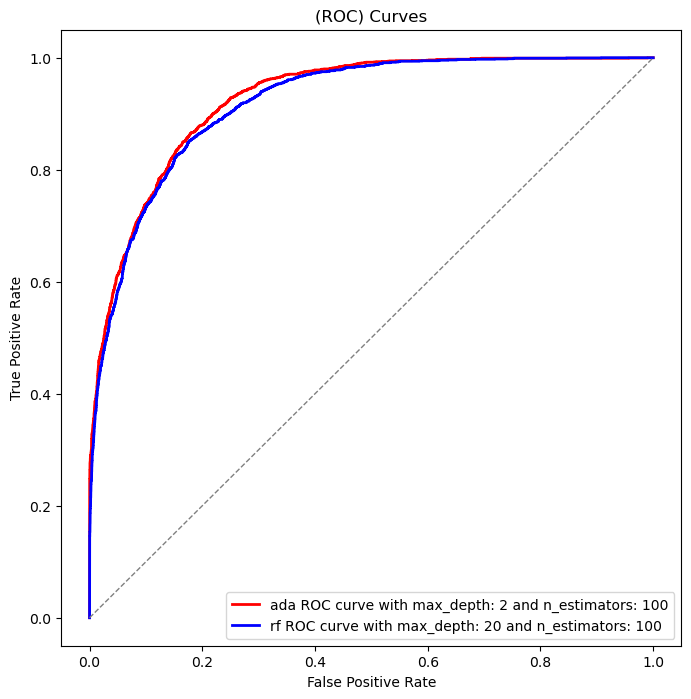

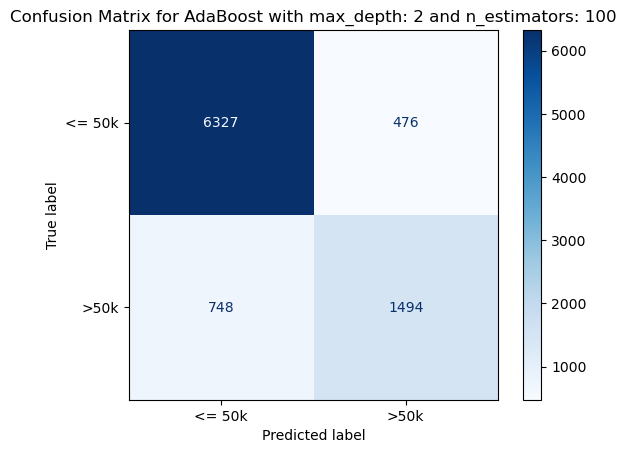

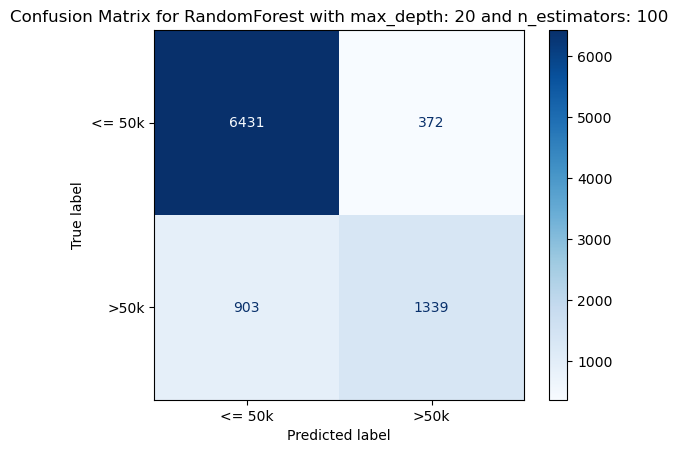

C:\Users\second\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.

C:\Users\second\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.



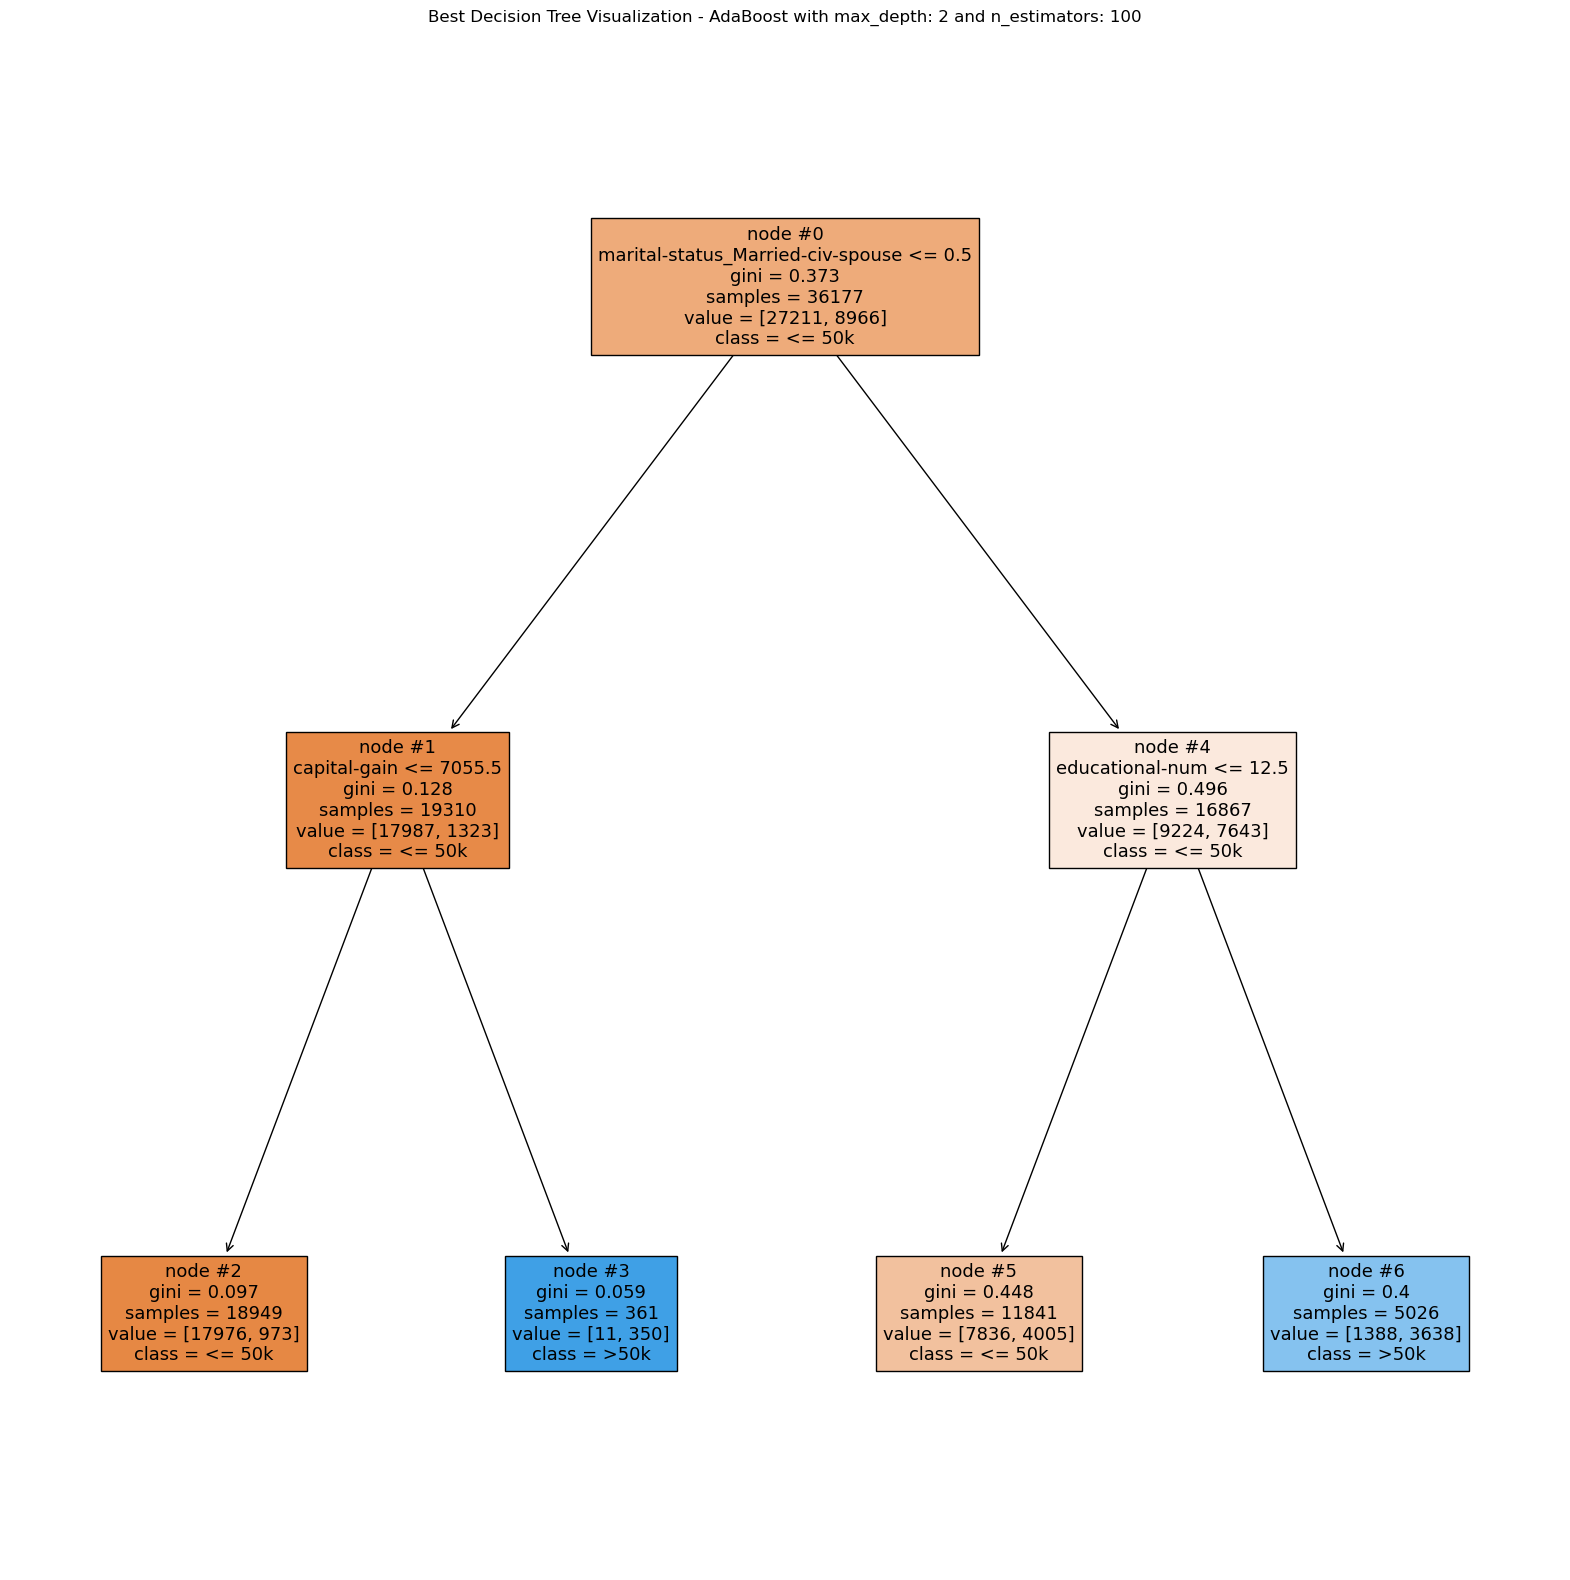

In [77]:
# Verifying results by testing on remaining 20% data

# AdaBoost
ada_classifier = best_ada["classifier"]

y_pred_ada = ada_classifier.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Random Forest
rf_classifier = best_rf["classifier"]

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Print results of best classifiers on verify data
class_names = ["<= 50k", ">50k"] 
print(f"AdaBoost report:\n{classification_report(y_test, y_pred_ada)}\nRandomForest report:\n{classification_report(y_test, y_pred_rf)}\n")
print(f"AdaBoost best accuracy: {best_ada['accuracy']}, after predict on 20%: {accuracy_ada}\nRandomForest best accuracy: {best_rf['accuracy']}, after predict on 20%: {accuracy_rf}")
createROC(ada_classifier, rf_classifier, X_test, y_test)


createConfusionMatrix(y_test, y_pred_ada, "AdaBoost", best_ada_max_depth, best_ada_n_estimators, class_names)
createConfusionMatrix(y_test, y_pred_rf, "RandomForest", best_rf_max_depth, best_rf_n_estimators, class_names)

createDecisionTree(best_ada["classifier"], X_train, y_train, "AdaBoost", y_attr_names, class_names)
createDecisionTree(best_rf["classifier"], X_train, y_train, "RandomForest", y_attr_names, class_names)


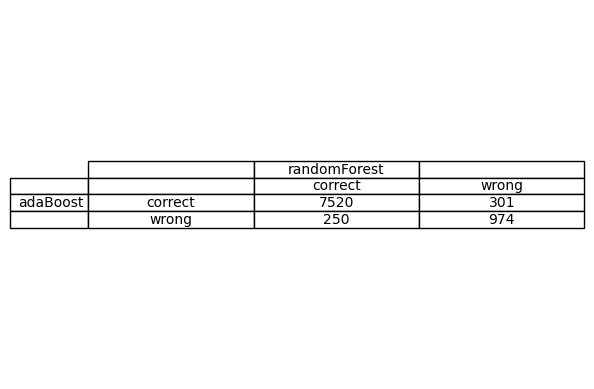

In [61]:
# AdaBoost RandomForest comparison 

bothCorrect = 0
adaCorrectRfWrong = 0
adaWrongRfCorrect = 0
bothWrong = 0


i = 0

for value in y_test :
    if (y_pred_ada[i] == value) :
        if (y_pred_rf[i] == value) :
            bothCorrect += 1
        else :
            adaCorrectRfWrong += 1
    else :
        if(y_pred_rf[i] == value) :
            adaWrongRfCorrect += 1
        else :
            bothWrong += 1
    i += 1


cell_text = [['' for _ in range(3)] for _ in range(3)]

cell_text[1][0] = 'correct'
cell_text[2][0] = 'wrong'
cell_text[0][1] = 'correct'
cell_text[0][2] = 'wrong'
cell_text[1][1] = bothCorrect
cell_text[1][2] = adaCorrectRfWrong
cell_text[2][1] = adaWrongRfCorrect
cell_text[2][2] = bothWrong

columns = [" ", "randomForest", ""]
rows = ["" , "adaBoost", " "]

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=cell_text, colLabels=columns, rowLabels=rows, cellLoc = 'center', loc='center')
plt.show()

In [82]:
# two-sided test sign test
b = binom((adaCorrectRfWrong + adaWrongRfCorrect),0.5)
pval = b.cdf(min(adaCorrectRfWrong,adaWrongRfCorrect)) + (1-b.cdf(max(adaCorrectRfWrong,adaWrongRfCorrect)-1))
print("p-value: " + str(pval))

p-value: 0.03307151591735797
